In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


# Data Loading and Preprocessing

In [2]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
first_image = X_train[0, :, :]

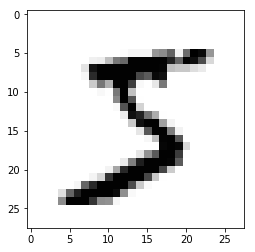

In [4]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [5]:
num_classes = len(np.unique(y_train))
num_classes

10

In [6]:
# 60K training 28 x 28 (pixel) images
X_train.shape

(60000, 28, 28)

In [7]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

In [8]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be a 4D tensor.
# Dimensions: num_images x 28 x 28 x 1
# The 1 is because we have a single channel (greyscale). If RGB color images, we'd have 3 channels.
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

In [9]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [10]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [11]:
# We convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Convolutional Neural Net (ConvNet)

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

## Different Ways to Summarize Model

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

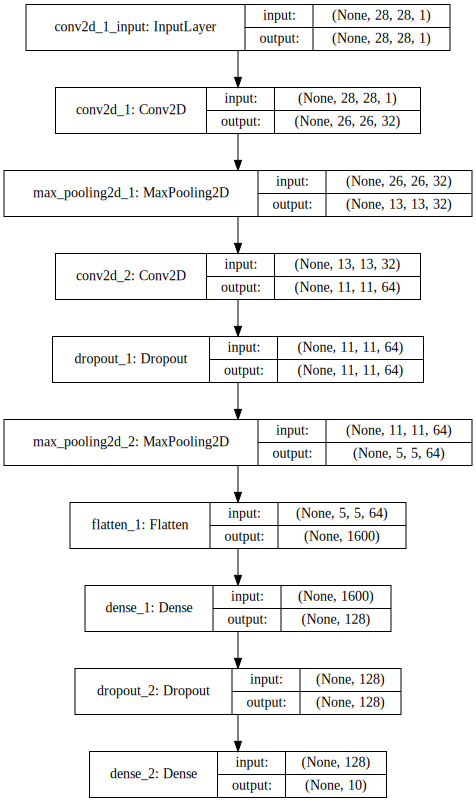

In [14]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
import json
json.loads(model.to_json())

{u'backend': u'tensorflow',
 u'class_name': u'Sequential',
 u'config': [{u'class_name': u'Conv2D',
   u'config': {u'activation': u'relu',
    u'activity_regularizer': None,
    u'batch_input_shape': [None, 28, 28, 1],
    u'bias_constraint': None,
    u'bias_initializer': {u'class_name': u'Zeros', u'config': {}},
    u'bias_regularizer': None,
    u'data_format': u'channels_last',
    u'dilation_rate': [1, 1],
    u'dtype': u'float32',
    u'filters': 32,
    u'kernel_constraint': None,
    u'kernel_initializer': {u'class_name': u'VarianceScaling',
     u'config': {u'distribution': u'uniform',
      u'mode': u'fan_avg',
      u'scale': 1.0,
      u'seed': None}},
    u'kernel_regularizer': None,
    u'kernel_size': [3, 3],
    u'name': u'conv2d_1',
    u'padding': u'valid',
    u'strides': [1, 1],
    u'trainable': True,
    u'use_bias': True}},
  {u'class_name': u'MaxPooling2D',
   u'config': {u'data_format': u'channels_last',
    u'name': u'max_pooling2d_1',
    u'padding': u'valid',

## Train Classifier

In [16]:
# Trains the model, iterating on the training data in batches of 128 in 5 epochs.
# Using the Adam optimizer.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 94s - loss: 0.3360 - acc: 0.8965    - E
Epoch 2/5
60000/60000 [==============================] - 97s - loss: 0.1246 - acc: 0.9627    
Epoch 3/5
60000/60000 [==============================] - 97s - loss: 0.0950 - acc: 0.9714    
Epoch 4/5
60000/60000 [==============================] - 99s - loss: 0.0789 - acc: 0.9766    
Epoch 5/5
60000/60000 [==============================] - 100s - loss: 0.0687 - acc: 0.9797   


## Model Evaluation

In [17]:
# Test accuracy is ~99%.
model.evaluate(X_test, y_test)

 9952/10000 [============================>.] - ETA: 0s

[0.036782560162921439, 0.98750000000000004]

## Predicting a Couple of Held-Out Images

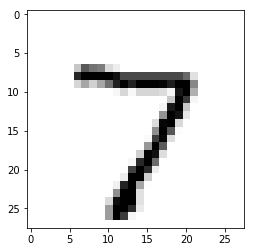

In [18]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

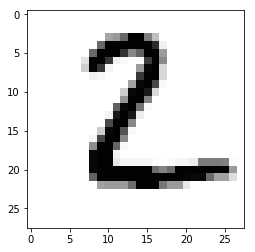

In [19]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [20]:
model.predict_classes(X_test[[0, 1], :])

2/2 [==============================] - 0s


array([7, 2])